In [16]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')
from glob import glob
import pyemma

<Figure size 432x288 with 0 Axes>

/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


<BarContainer object of 99 artists>

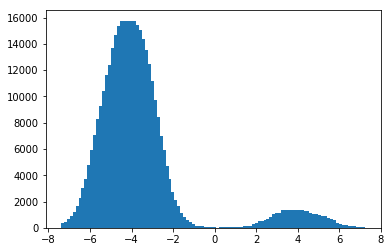

In [31]:
xs = np.load('data/kramers_4.1.npy')
bins = np.linspace(-7, 7, 100)
hist, _ = np.histogram(xs, bins)
plt.bar(bins[:-1], hist)

In [32]:
data = xs[:,0,0]
cluster = pyemma.coordinates.cluster_kmeans(data, k=2, max_iter=50)

24-06-19 13:01:41 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[28] WARNING  Ignoring lag times that exceed the longest trajectory: [500000]


24-06-19 13:02:05 pyemma.msm.estimators.bayesian_msm.BayesianMSM[30] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
24-06-19 13:02:08 pyemma.msm.estimators.bayesian_msm.BayesianMSM[30] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
24-06-19 13:02:08 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[28] WARNING  Estimation has failed at lagtimes: [ 50000 100000]. Details:
['Error at lag time 50000: Active set is empty. Cannot estimate MSM.',
 'Error at lag time 100000: Active set is empty. Cannot estimate MSM.']
24-06-19 13:02:08 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[28] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


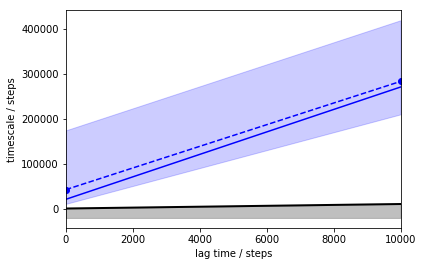

In [43]:
its = pyemma.msm.its(cluster.dtrajs, lags=[1, 10000, 50000, 100000, 500000], nits=1, errors='bayes')
pyemma.plots.plot_implied_timescales(its, ylog=False);

In [44]:
its.timescales

array([[ 20444.09946243],
       [270392.01350585]])